## Simulate

Simplest possible harmonic oscillator in 1D in pure Python.

In [60]:
# number of steps
n_steps = 100

# time step
dt = 0.27

# mass
m = 1.15

# initial conditions - positions
q0 = 0.65

# initial conditions - momenta
p0 = 1.0

# initial values of quantities that will evolve
q = q0
p = p0
t = 0.0

# harmonic potential spring constant
k = 1.25

# initial interactions update
def potential(q):
    return 0.5 * k * q**2

def force(q):
    return -k * q


E_p = potential(q)
dU_dx = -force(q)
F = - dU_dx

# data collection
trj_t = []
trj_q = []
trj_p = []
trj_E_p = []

# output at t = 0
trj_t.append(t)
trj_q.append(q)
trj_p.append(p)
trj_E_p.append(E_p)

# main loop
for i in range(n_steps):

    p += F * dt/2
    q += p/m * dt

    F = force(q)
    p += F * dt/2
    E_p = potential(q)
    # full step done, update time
    t += dt

    # output at this step
    trj_t.append(t)
    trj_q.append(q)
    trj_p.append(p)
    trj_E_p.append(E_p)

## Process and plot

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
plt.style.use('classic')
plt.style.use({'figure.dpi': 150})

### Trajectory

Text(0.5, 0, 'Time')

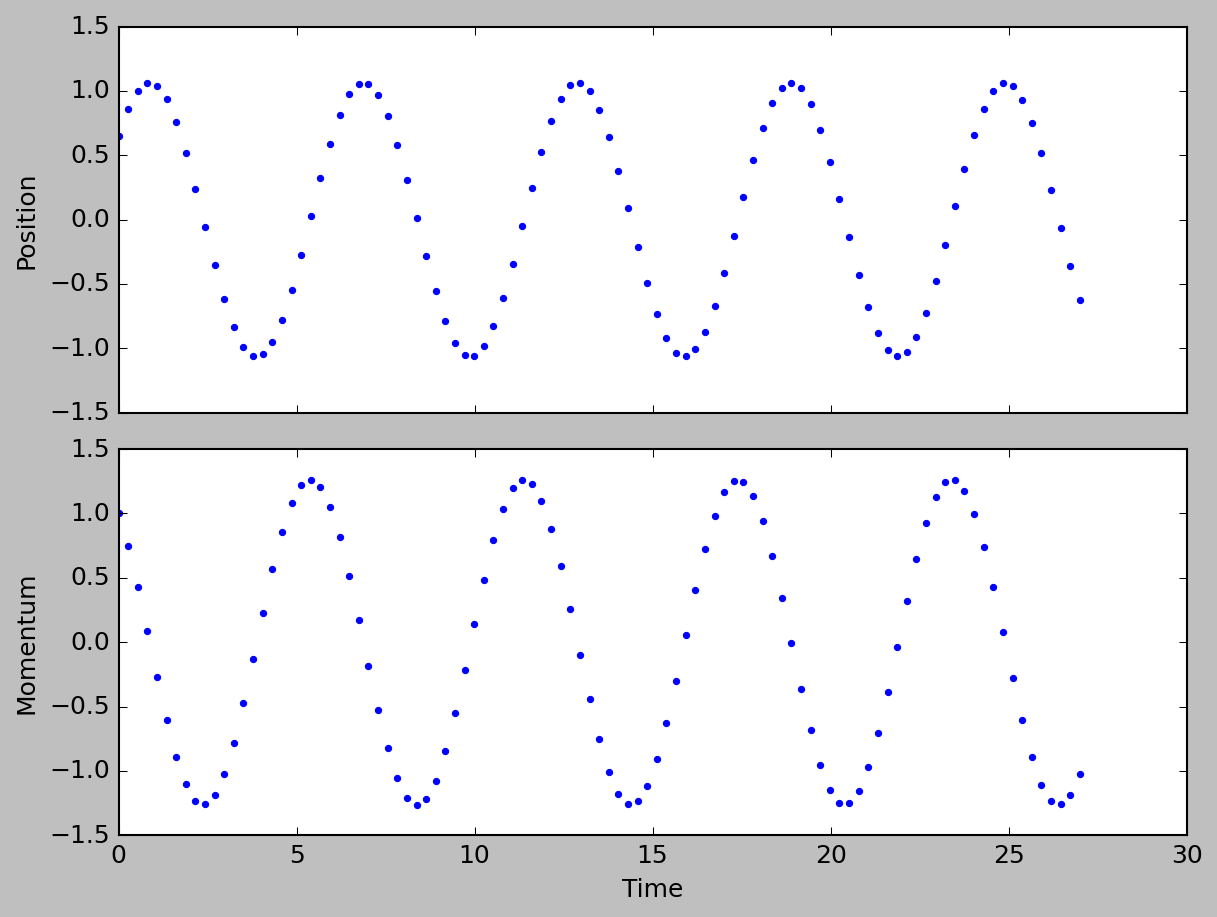

In [63]:
plt.figure(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.plot(trj_t, trj_q, '.')
plt.ylabel('Position')
plt.tick_params(labelbottom=False)

plt.subplot(2, 1, 2)
plt.plot(trj_t, trj_p, '.')
plt.ylabel('Momentum')

plt.xlabel('Time')

Text(0, 0.5, 'Momentum')

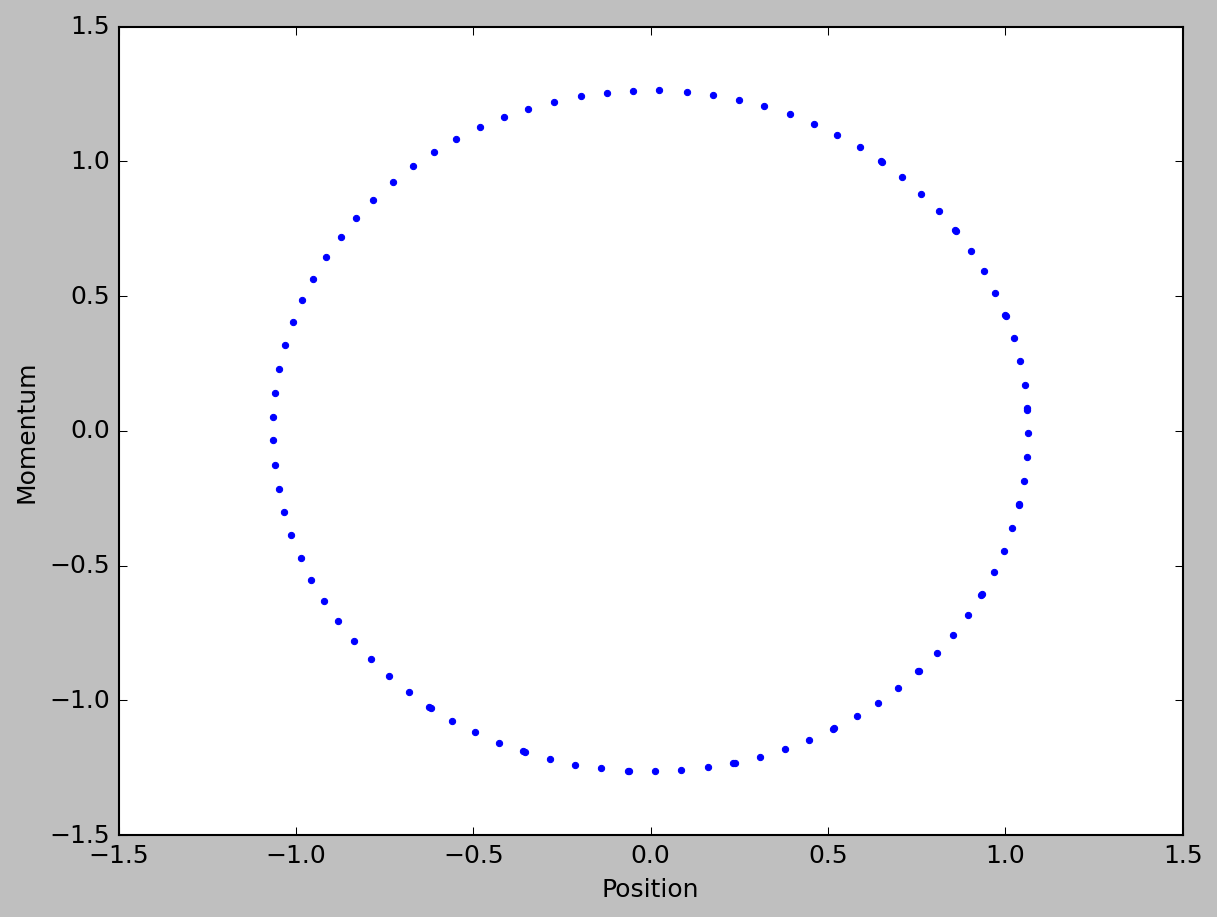

In [64]:
plt.figure(constrained_layout=True)

plt.plot(trj_q, trj_p, '.')
plt.xlabel('Position')
plt.ylabel('Momentum')

### Energies

In [65]:
# calculate kinetic energy along trajectory
trj_E_k = np.array(trj_p)**2 / (2 * m)

Text(0, 0.5, 'Energy')

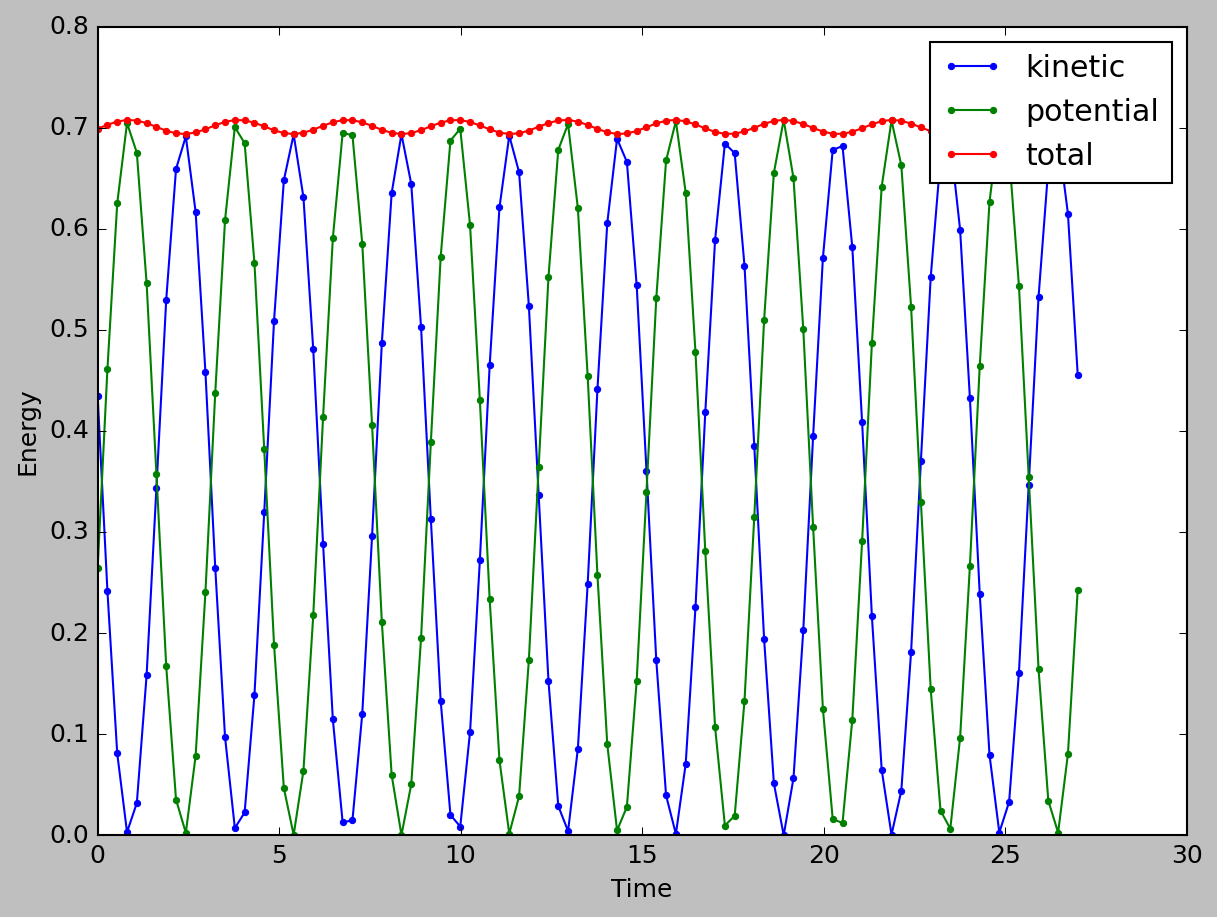

In [66]:
plt.figure(constrained_layout=True)

plt.plot(trj_t, trj_E_k, '.-', label='kinetic')
plt.plot(trj_t, trj_E_p, '.-', label='potential')
plt.plot(trj_t, trj_E_k + trj_E_p, '.-', label='total')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Energy')